In [2]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


In [20]:
from sklearn.linear_model import Ridge, Lasso
import numpy as np
import cv2

from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model
from sklearn.model_selection import train_test_split


%matplotlib inline
import matplotlib.pyplot as plt



In [4]:
df = pd.read_csv('drive/MyDrive/DataFiles/MI_clean.csv')
df

,Unnamed: 0,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,0,1,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,4,5,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,1691,1692,62.0,1,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,3
1504,1692,1693,71.0,0,0.0,6.0,2.0,2.0,2.0,0.0,...,0,0,0,0,1,0,0,1,0,3
1505,1694,1695,77.0,0,0.0,0.0,0.0,0.0,2.0,0.0,...,0,0,0,0,1,0,0,0,0,3
1506,1695,1696,77.0,0,0.0,4.0,2.0,1.0,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3


In [5]:
df.shape

(1508, 118)

In [6]:
df.info

<bound method DataFrame.info of       Unnamed: 0    ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  \
0              0     1  77.0    1       2.0        1.0        1.0       2.0   
1              1     2  55.0    1       1.0        0.0        0.0       0.0   
2              2     3  52.0    1       0.0        0.0        0.0       2.0   
3              3     4  68.0    0       0.0        0.0        0.0       2.0   
4              4     5  60.0    1       0.0        0.0        0.0       2.0   
...          ...   ...   ...  ...       ...        ...        ...       ...   
1503        1691  1692  62.0    1       0.0        0.0        0.0       0.0   
1504        1692  1693  71.0    0       0.0        6.0        2.0       2.0   
1505        1694  1695  77.0    0       0.0        0.0        0.0       0.0   
1506        1695  1696  77.0    0       0.0        4.0        2.0       1.0   
1507        1698  1699  79.0    0       2.0        2.0        2.0       1.0   

       GB  SIM_GIPE

In [7]:
print(df.isnull().sum())


Unnamed: 0    0
ID            0
AGE           0
SEX           0
INF_ANAM      0
             ..
DRESSLER      0
ZSN           0
REC_IM        0
P_IM_STEN     0
LET_IS        0
Length: 118, dtype: int64


In [9]:
df = df.dropna()
df.shape

(667, 118)

In [60]:
new_df = pd.get_dummies(df[['SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK']])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 667 entries, 1 to 1505
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEX        667 non-null    int64  
 1   INF_ANAM   667 non-null    float64
 2   STENOK_AN  667 non-null    float64
 3   FK_STENOK  667 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 42.2 KB


In [61]:
y = df['LET_IS']!=0

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [63]:
X_numerical = new_df.astype('float64')
list_numerical =  X_numerical.columns
list_numerical

X = pd.concat([X_numerical], axis=1)
X

,SEX,INF_ANAM,STENOK_AN,FK_STENOK
1,1.0,1.0,0.0,0.0
10,1.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0
13,1.0,0.0,0.0,0.0
14,1.0,1.0,1.0,2.0
...,...,...,...,...
1495,0.0,1.0,5.0,2.0
1496,0.0,0.0,4.0,2.0
1501,0.0,2.0,6.0,3.0
1504,0.0,0.0,6.0,2.0


In [65]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(X_train, y_train)

Lasso(alpha=1)

In [66]:
print('R squared training set', round(reg.score(X_train, y_train)*100, 2))
print('R squared test set', round(reg.score(X_test, y_test)*100, 2))

R squared training set 0.0
R squared test set -1.3


In [67]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 0.09
MSE test set 0.07


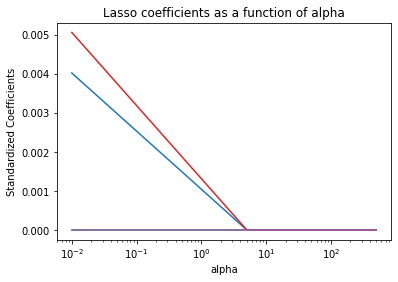

In [68]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [69]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [70]:
model.alpha_


0.05714785684024391

In [71]:
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)

Lasso(alpha=0.05714785684024391)

In [72]:
print(list(zip(lasso_best.coef_, X)))


[(0.003915484019766517, 'SEX'), (-0.0, 'INF_ANAM'), (0.0, 'STENOK_AN'), (0.0, 'FK_STENOK')]


In [73]:
print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

R squared training set 2.77
R squared test set -3.49


In [74]:
mean_squared_error(y_test, lasso_best.predict(X_test))


0.06705982417668117

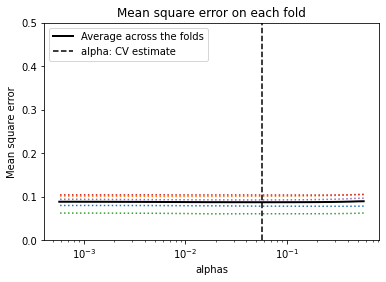

In [77]:
plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 0,0.50
plt.ylim(ymin, ymax);